# NIHANJA STRUKTUR

### 1. vaja

In [1]:
pip install lvm_read

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lvm_read

In [266]:
txt = 'test_4b'
lvm = lvm_read.read(txt+'.lvm')
lvm[0].keys()

dict_keys(['Channels', 'Samples', 'Date', 'Time', 'Y_Unit_Label', 'X_Dimension', 'X0', 'Delta_X', 'data', 'Channel names'])

In [267]:
samples_force = lvm[0]['Samples'][1]
delta_x_force = lvm[0]['Delta_X'][1]
x_force = np.arange(0, samples_force*delta_x_force, delta_x_force)
force = lvm[0]['data'][:samples_force,1]
accel = lvm[0]['data'][:samples_force,2]

samples_spect = lvm[0]['Samples'][3]
delta_x_spect = lvm[0]['Delta_X'][3]
x_spect = np.arange(0, samples_spect*delta_x_spect, delta_x_spect)
#x_spect = [_/(2*np.pi) for _ in x_spect]
spect = lvm[0]['data'][:samples_spect,3]
phase = lvm[0]['data'][:samples_spect,4]

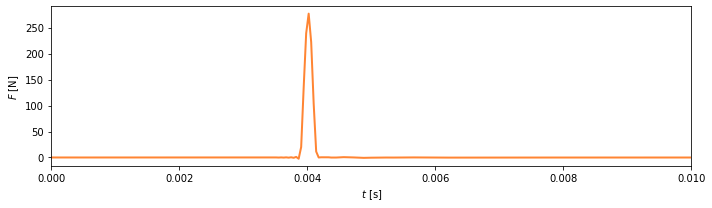

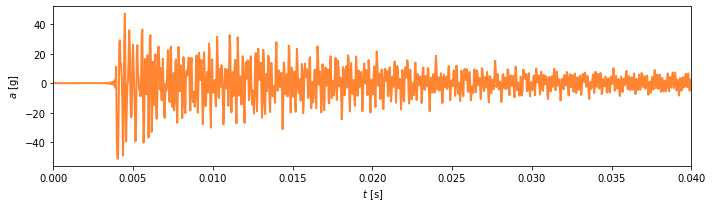

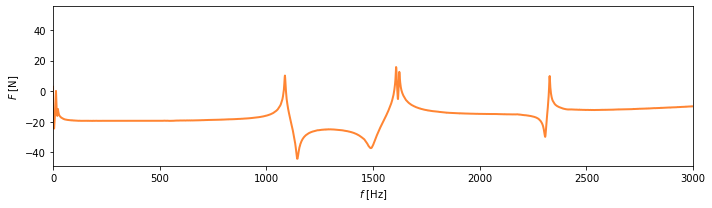

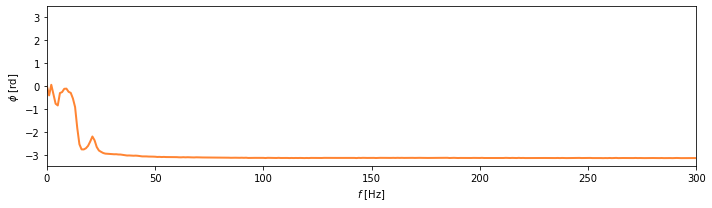

In [268]:
fig = plt.figure(figsize = (10, 3))
plt.plot(x_force, force, '#ff8533', lw=2)
plt.xlim(0, 0.01)
plt.xlabel('$t\ \mathrm{[s]}$')
plt.ylabel('$F\ \mathrm{[N]}$')
plt.tight_layout()

plt.figure(figsize = (10, 3))
plt.plot(x_force, accel, '#ff8533', lw=2)
plt.xlim(0, 0.04)
plt.xlabel('$t\ \mathrm{[s]}$')
plt.ylabel('$a\ \mathrm{[g]}$')
plt.tight_layout()

fig = plt.figure(figsize = (10, 3))
plt.plot(x_spect, spect, '#ff8533', lw=2)
plt.xlim(0, 3000)
plt.xlabel('$f\ \mathrm{[Hz]}$')
plt.ylabel('$F\ \mathrm{[N]}$')
plt.tight_layout()
fig.savefig(txt+'_spect.png', dpi=300)

plt.figure(figsize = (10, 3))
plt.plot(x_spect, phase, '#ff8533', lw=2)
plt.xlim(0, 300)
plt.xlabel('$f\ \mathrm{[Hz]}$')
plt.ylabel('$\phi\ \mathrm{[rd]}$')
plt.tight_layout()
fig.savefig(txt+'_phase.png', dpi=300)

In [7]:
E = 70000E6
L = 0.300
h = 0.040
V = h**2*L
rho = 2800
I = h**4/12
m = rho*V
q = m/L
k = E*I/L

In [10]:
n=1
f1 = 1/(2*np.pi)*(n*np.pi/L)**2*(E*I/q)**0.5
f2 = f1*2.757
f1, f2

(1007.6663134634546, 2778.1360262187445)

In [8]:
f1 = 1/(2*np.pi)*(22.373/L**2)*(E*I/q)**0.5
f2 = f1*2.757
f1, f2

(2284.237292087362, 6297.642214284858)

In [9]:
o1 = (22.373/L**2)*(E*I/q)**0.5
o2 = o1*2.757
o1, o2

(14352.286191754998, 39569.25303066853)

### Furier transform

(0, 10)

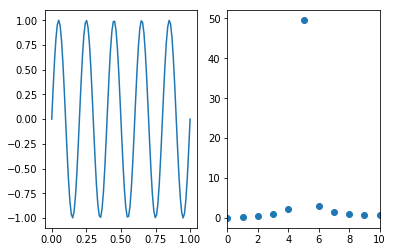

In [11]:
#test
rate = 100
time_test = np.linspace(0,1,rate)
accel_1 = np.array([np.sin(5*x*2*np.pi) for x in time_test])
X = np.fft.rfft(accel_1)
freq = np.fft.rfftfreq(accel_1.size, 1/rate)
plt.subplot(1, 2, 1)
plt.plot(time_test, accel_1)
plt.subplot(1, 2, 2)
plt.plot(freq, abs(X), 'o')
plt.xlim(0, 10)

In [12]:
# Fourier transform
X_values, F_values = [], []
for pos in range(0, num_of_points): # for all measured points
    
    Xi, Fi = [], [] # lists of spectral densities of all measurements
    for i in [_ for _ in list(lvm[pos].keys()) if type(_) == int]: # for all int dict keys
        samples = lvm[pos][i]['Samples'][1]
        dt = lvm[pos][i]['Delta_X'][1]
        force = lvm[pos][i]['data'][:,0]
        accel = lvm[pos][i]['data'][:,1]
        F = np.fft.rfft(force)*2/samples
        X = np.fft.rfft(accel)*2/samples
        Fi.append(F)
        Xi.append(X)
    f = np.fft.rfftfreq(samples, dt)
    
    X_values.append(Xi) # acceleration
    F_values.append(Fi) # frequency

(0, 1100)

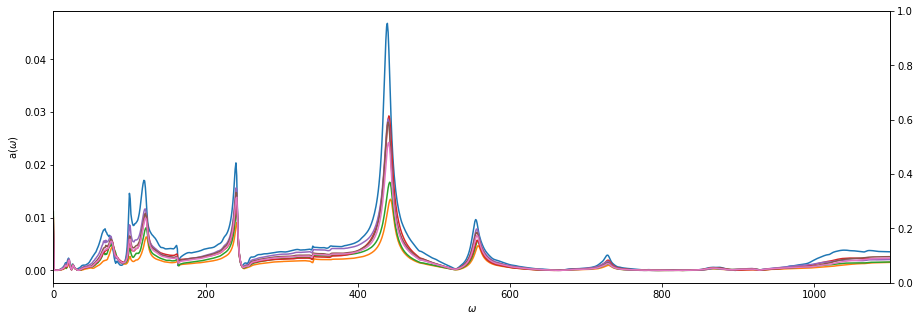

In [13]:
# plot all spectral densities of acceleration
pos = 5
plt.figure(figsize=(15,5))
for i in range(len(F_values[pos])):
    plt.plot(f, abs(X_values[pos][i]))#, 'o')
plt.ylabel('a($\omega$)')
plt.xlabel('$\omega$')
plt.twinx()
#plt.plot(f, np.angle(X_values[pos][0], deg=1))
plt.xlim(0, 1100)

### 2.vaja

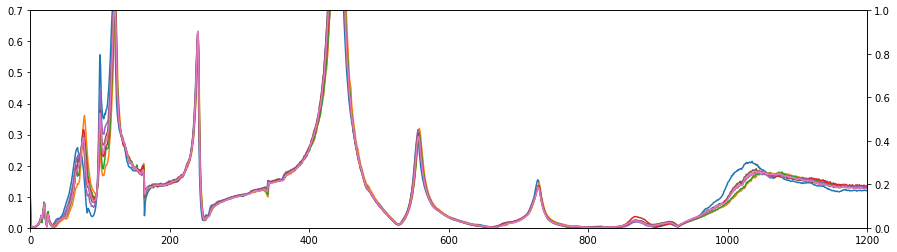

In [14]:
# FRF estimator without windowing
pos = 5
plt.figure(figsize=(15,4))
for i in range(len(F_values[pos])):
    H1 = (np.conj(F_values[pos][i])*X_values[pos][i])/(np.conj(F_values[pos][i])*F_values[pos][i])
    plt.plot(f, np.abs(H1))#, 'blue')
plt.xlim(0, 1200)
plt.ylim(0, 0.7)
plt.twinx()
#plt.plot(f, np.angle(H1, deg=1), 'orange')

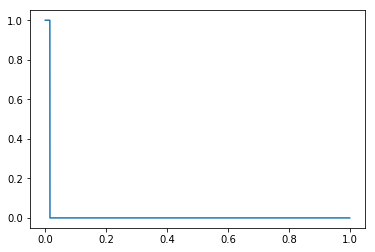

In [15]:
# force window
w_f = np.zeros(samples)
w_f[time < 0.015] = 1
plt.plot(time, w_f)

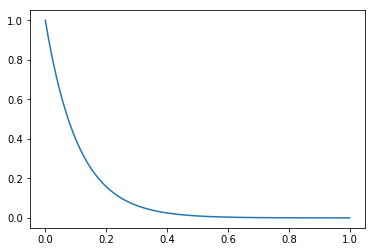

In [16]:
# exponential window
last_value = 1*1e-4
w_x = np.arange(samples)
w_x = np.exp(w_x/(samples-1)*np.log(last_value))
plt.plot(time, w_x)

In [17]:
# spectral densities of windowed data
X_values, F_values = [], []
for pos in range(num_of_points): # for all measured points
        
    Xi, Fi = [], []
    for i in [_ for _ in list(lvm[pos].keys()) if type(_) == int]: # for all int dict keys
        samples = lvm[pos][i]['Samples'][1]
        zero_pad = 10*samples
        dt = lvm[pos][i]['Delta_X'][1]
        force = lvm[pos][i]['data'][:,0]
        force *= w_f
        force = np.append(force, np.zeros(zero_pad))
        accel = lvm[pos][i]['data'][:,1]
        accel *= w_x
        accel = np.append(accel, np.zeros(zero_pad))
        F = np.fft.rfft(force)*2/(samples + zero_pad)
        X = np.fft.rfft(accel)*2/(samples + zero_pad)
        Fi.append(F)
        Xi.append(X)
    f = np.fft.rfftfreq(samples + zero_pad, dt)
    
    X_values.append(Xi)
    F_values.append(Fi)

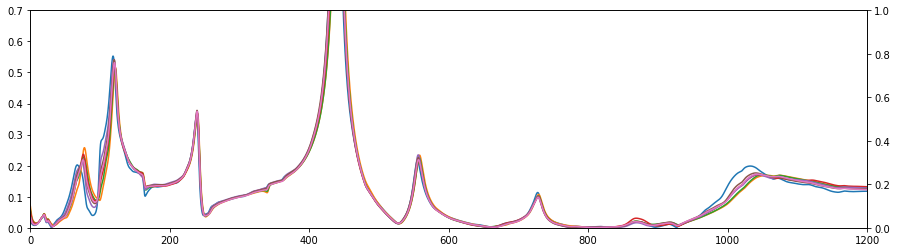

In [18]:
# FRF estimator with windowing
pos = 5
plt.figure(figsize=(15,4))
for i in range(len(F_values[pos])):
    H1 = (np.conj(F_values[pos][i])*X_values[pos][i])/(np.conj(F_values[pos][i])*F_values[pos][i])
    plt.plot(f, np.abs(H1))
plt.xlim(0, 1200)
plt.ylim(0, 0.7)
plt.twinx()
#plt.plot(f, np.angle(H1, deg=1), 'orange')

(0, 1.4)

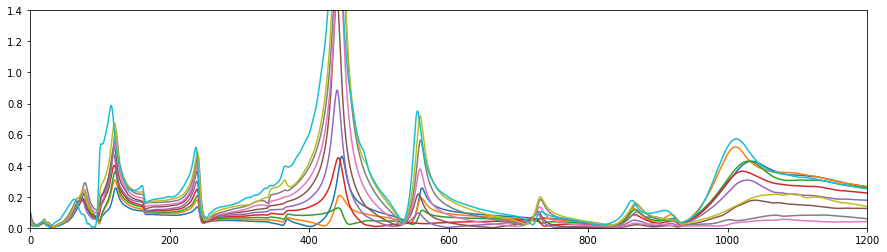

In [19]:
H1_w, H2_w = [], []
for pos in range(num_of_points): # for all measured points
    
    measurements = len(F_values[pos])
    S_fx = 0
    S_ff = 0
    S_xx = 0
    S_xf = 0
    for i in range(measurements):
        S_fx += np.conj(F_values[pos][i])*X_values[pos][i]/measurements # average
        S_ff += np.conj(F_values[pos][i])*F_values[pos][i]/measurements
        S_xx += np.conj(X_values[pos][i])*X_values[pos][i]/measurements
        S_xf += np.conj(X_values[pos][i])*F_values[pos][i]/measurements
        
    H1_w.append(S_fx/S_ff)
    H2_w.append(S_xx/S_xf)
    
plt.figure(figsize=(15,4))
for pos in range(num_of_points):
    plt.plot(f, abs(H1_w[pos]))
plt.xlim(0, 1200)
plt.ylim(0, 1.4)

C:\Users\Drejc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


(7.322236396002154e-05, 2)

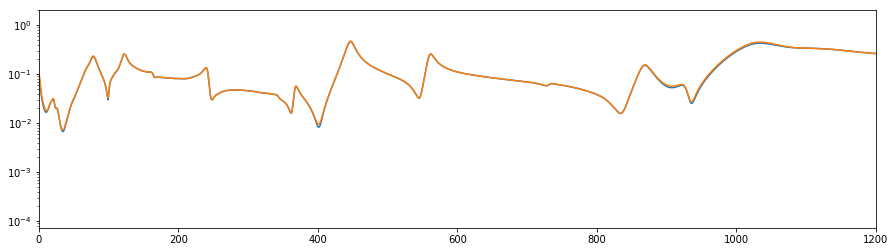

In [20]:
# difference between H1 and H2
pos = 0

plt.figure(figsize=(15,4))
plt.semilogy(f, abs(H1_w[pos]))
plt.semilogy(f, abs(H2_w[pos]))
plt.xlim(0, 1200)
plt.ylim(0, 2)

Text(0.5, 0, '$\\omega$[rad/s]')

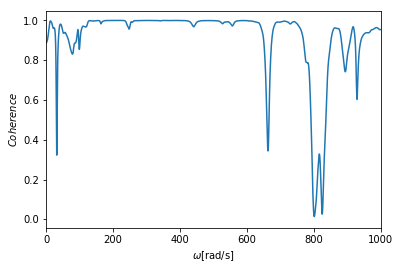

In [21]:
# coherence
pos = 5

coherence = abs(H1_w[pos])/abs(H2_w[pos])
plt.plot(f, coherence)
plt.xlim(0, 1000)
plt.ylabel('$Coherence$')
plt.xlabel('$\omega$[rad/s]')

### 3. vaja

In [22]:
# transition to receptance
alpha = []
for pos in range(num_of_points):
    A1 = np.append(np.zeros(1), -H1_w[pos][1:]/(2*np.pi*f[1:])**2) # receptance
    alpha.append(A1)

(0, 1400)

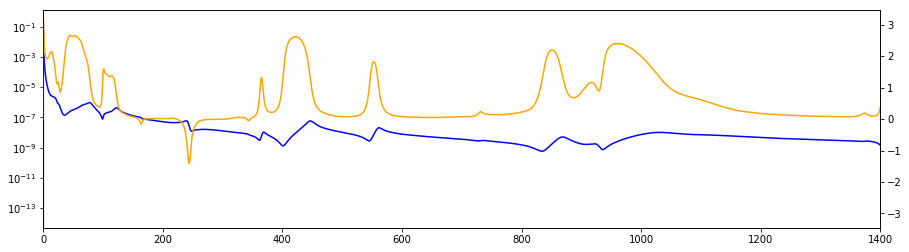

In [23]:
pos = 0

plt.figure(figsize=(15,4))
plt.semilogy(f, np.abs(alpha[pos]), 'blue')
plt.twinx()
plt.plot(f, np.angle(alpha[pos]), 'orange')
plt.xlim(0, 1400)
#plt.xlim(530,600)
#plt.ylim(0,0.0001)

(10, 1200)

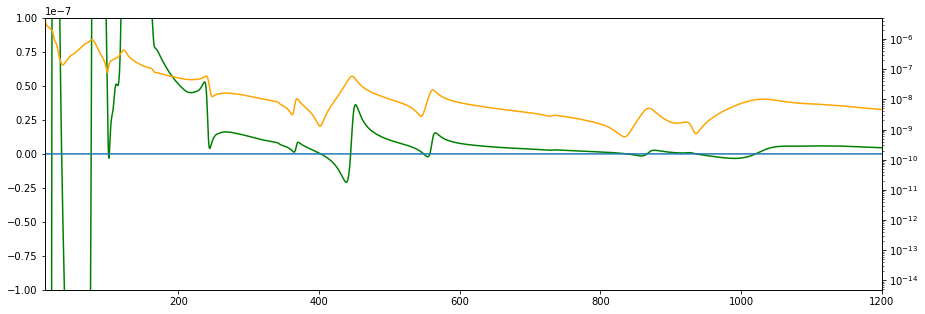

In [24]:
# real and imag component of receptance
pos = 0

plt.figure(figsize=(15,5))
plt.plot(f, np.real(alpha[pos]), 'green')
plt.plot(f, np.zeros(len(f)))
plt.ylim(-0.0000001,0.0000001)
plt.twinx()
plt.semilogy(f, np.abs(alpha[pos]), 'orange')
plt.ylim(0,0.000005)
plt.xlim(10,1200)

In [25]:
alpha_range = [] # receptance in range of frequencies (around resonance)
for pos in range(num_of_points):
    f_min, f_max = np.argwhere(f == 420)[0][0], np.argwhere(f == 500)[0][0]
    alpha_range.append(alpha[pos][f_min:f_max])
    f_range = f[f_min:f_max]

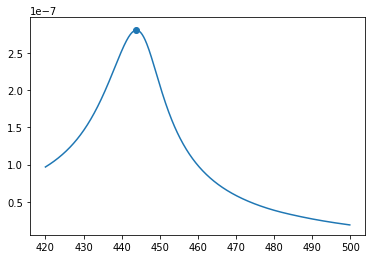

In [26]:
index_max = []
freq1_simple = []
for pos in range(num_of_points):
    index_max.append(np.argmax(np.abs(alpha_range[pos]))) # position of maximum
    freq1_simple.append(f_range[index_max]) # frequency at maximum
    
pos = 7
plt.plot(f_range, np.abs(alpha_range[pos]))
plt.scatter(f_range[index_max[pos]], np.abs(alpha_range[pos][index_max[pos]]))

In [27]:
xi1_simple = []
ampl1_simple = []
for pos in range(num_of_points):
    
    # positions of values greater than max/2
    max_half = np.argwhere(np.abs(alpha_range[pos]) > np.abs(alpha_range[pos][index_max[pos]])/2)
    index_left, index_right = max_half[0][0], max_half[-1][0]

    # dissipation 
    eta = (f[index_right] - f[index_left])/f[index_max[pos]]
    xi1_simple.append(eta/2)
    
    # amplitude (imag component as real in resonance should be 0)
    ampl = np.imag(alpha_range[pos][index_max[pos]])
    ampl1_simple.append(ampl)

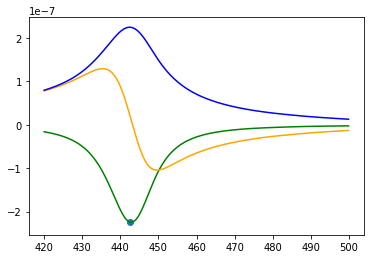

In [28]:
pos = 6

plt.plot(f_range, np.imag(alpha_range[pos]), 'green')
plt.plot(f_range, np.real(alpha_range[pos]), 'orange')
plt.plot(f_range, np.abs(alpha_range[pos]), 'blue')
plt.scatter(f_range[index_max[pos]], np.imag(alpha_range[pos][index_max[pos]]))

Text(0, 0.5, 'receptance')

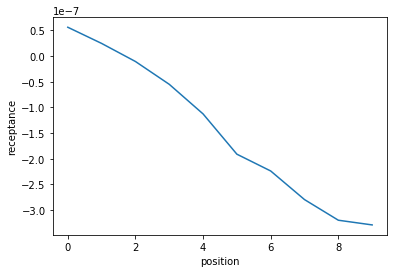

In [29]:
# modal shape
plt.plot(ampl1_simple)
plt.xlabel('position')
plt.ylabel('receptance')

In [30]:
# receptance at resonance in all positions on beam
string = 10*'{:.2E} '
print(string.format(*ampl1_simple))

5.60E-08 2.45E-08 -1.06E-08 -5.50E-08 -1.13E-07 -1.91E-07 -2.24E-07 -2.79E-07 -3.20E-07 -3.29E-07 


# Identifikacija modalnih parametrov

## Circle fitting method

#### Simulirani podatki

In [31]:
f0 = [320, 700, 1000]
C = [0.1 + 0.1j, 0.05 - 0.05j, 0.025 - 0.025j]
D = 1*1e-9*(1-1j)
eta = [0.01*5e-3, 0.01*5e-3, 0.03*5e-3]
df = 1/500
f_ = 1*np.arange(0, 1500, df)

def receptance(f0, C, D, eta, f):
    f0 = np.array(f0)
    C = np.array(C)
    eta = np.array(eta)

    w0 = f0*2*np.pi
    w = f*2*np.pi
    
    n = len(f0)
    alpha = np.zeros(len(f), dtype=complex)
    for _ in range(n):
        alpha += C[_]/(w0[_]**2 - w**2 +1.j*eta[_]*w0[_]**2)
    alpha += D
    
    return alpha

Text(0, 0.5, '$\\phi\\ \\mathrm{[^{\\circ}]}$')

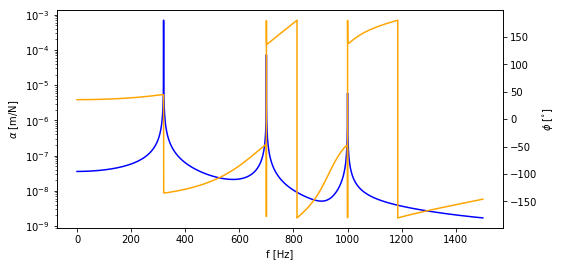

In [32]:
_alpha = receptance(f0, C, D, eta, f_)
plt.figure(figsize=(8,4))
plt.semilogy(f_, np.abs(_alpha), 'blue')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\alpha\ \mathrm{[m/N]}$')
plt.twinx()
plt.plot(f_, np.angle(_alpha, deg=1), 'orange')
plt.ylabel('$\phi\ \mathrm{[^{\circ}]}$')

Text(0, 0.5, 'Im($\\alpha$)')

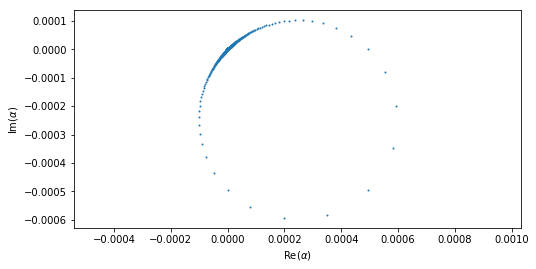

In [33]:
frequencies = [[200,500],[500,850],[850,1200]]
f_indexes = np.array([[int(np.argwhere(f_==_[0])), int(np.argwhere(f_==_[1]))] for _ in frequencies])

i = 0
index_min, index_max = f_indexes[i]
plt.figure(figsize=(8,4))
plt.plot(np.real(_alpha[index_min:index_max]), np.imag(_alpha[index_min:index_max]), 'o', markersize=1)
plt.axis('equal')
plt.xlabel(r'Re($\alpha$)')
plt.ylabel(r'Im($\alpha$)')

In [34]:
def cos_alpha(a, b, c): # cosine rule
    return np.arccos((a*a-b*b-c*c)/(-2*b*c))

def length_to0(_x0, _y0, _x1, _y1): 
    return np.sqrt((_x1-_x0)**2 + (_y1-_y0)**2)

def three_point_angle(_x0, _y0, _x1, _y1, _x2, _y2):
    _len_a = length_to0(_x0, _y0, _x1, _y1)
    _len_b = length_to0(_x0, _y0, _x2, _y2)
    _len_c = length_to0(_x1, _y1, _x2, _y2)
    return cos_alpha(_len_c, _len_a, _len_b)

In [40]:
centers = []
radiuses = []
gamma_angles = []
indexes_max = []

eta_ident = []
C_ident = []
f0_ident = []
for index_min, index_max in f_indexes:
    [x,y] = np.array([np.real(_alpha[index_min:index_max]), np.imag(_alpha[index_min:index_max])])
    # circle fitting
    A = np.array([[np.sum(x*x), np.sum(x*y), -np.sum(x)],
                 [np.sum(x*y), np.sum(y*y), -np.sum(y)],
                 [-np.sum(x), -np.sum(y), len(x)]])
    b = np.array([[-(np.sum(x*x*x) + np.sum(x*y*y))],
                 [-(np.sum(y*y*y) + np.sum(y*x*x))],
                 [np.sum(x*x) + np.sum(y*y)]])
    a, b, c = np.linalg.solve(A, b)
    x0 = -a[0]/2
    y0 = -b[0]/2
    R0 = np.sqrt(c[0]+x0*x0+y0*y0)
    centers.append([x0, y0])
    radiuses.append(R0)
    
    # finding position of resonance frequency
    d_gamma = three_point_angle(x0, y0, x[:-1], y[:-1], x[1:], y[1:])
    gamma_angles.append(d_gamma)
    i_max = int(np.argwhere(d_gamma==np.nanmax(d_gamma)))
    indexes_max.append(i_max)
    w = f_*2*np.pi
    w0_ident = w[index_min+i_max]
    f0_ident.append(f_[index_min+i_max])
    
    # finding coefficient of dissipation
    r = 1 # num of points from resonance frequency position
    w_a = w[index_min+i_max+r]
    fi_a = three_point_angle(x0, y0, x[i_max], y[i_max], x[i_max+r], y[i_max+r])/2
    w_b = w[index_min+i_max-r]
    fi_b = three_point_angle(x0, y0, x[i_max], y[i_max], x[i_max-r], y[i_max-r])/2
    eta_id = float((w_a**2 - w_b**2)/w0_ident**2 * 1/(np.tan(fi_a) + np.tan(fi_b)))
    eta_ident.append(eta_id)
    
    # finding modal constant
    xD, yD = x0-(x[i_max]-x0), y0-(y[i_max]-y0)
    theta_id = np.arctan(-(x0-xD)/(y0-yD))
    Cr_ident = 2*R0*w0_ident**2*eta_id
    C_id = Cr_ident*np.exp(1.j*theta_id)
    C_ident.append(C_id)

C:\Users\Drejc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


Text(0, 0.5, 'Im($\\alpha$)')

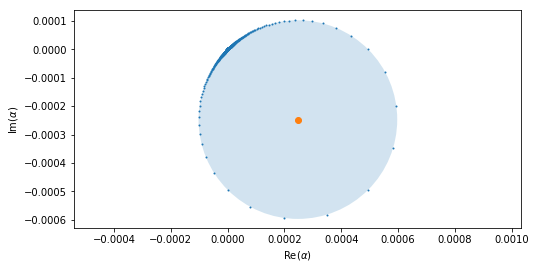

In [764]:
i = 0
index_min, index_max = f_indexes[i]
ax = plt.figure(figsize=(8,4)).gca()
plt.plot(np.real(_alpha[index_min:index_max]), np.imag(_alpha[index_min:index_max]), 'o', markersize=1)
plt.plot(centers[i][0], centers[i][1], 'o')
circ = plt.Circle(centers[i], radiuses[i], alpha=0.2)
ax.add_artist(circ)
plt.axis('equal')
plt.xlabel(r'Re($\alpha$)')
plt.ylabel(r'Im($\alpha$)')

Text(0, 0.5, '$\\theta$ [rd]')

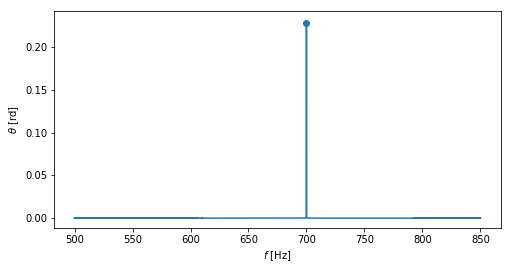

In [765]:
i = 1
index_min, index_max = f_indexes[i]
plt.figure(figsize=(8,4))
plt.plot(f_[index_min:index_max-1], gamma_angles[i])
plt.scatter(f_[index_min+indexes_max[i]], gamma_angles[i][indexes_max[i]])
plt.xlabel('$f$ [Hz]')
plt.ylabel(r'$\theta$ [rd]')

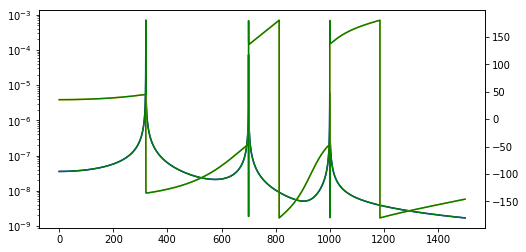

In [766]:
# primerjava
plt.figure(figsize=(8,4))
plt.semilogy(f_, np.abs(_alpha), 'blue')
plt.semilogy(f_, np.abs(receptance(f0_ident, C_ident, D, eta_ident, f_)), 'green')
plt.twinx()
plt.plot(f_, np.angle(_alpha, deg=1), 'orange')
plt.plot(f_, np.angle(receptance(f0_ident, C_ident, D, eta_ident, f_), deg=1), 'green')

### Real data

In [782]:
C_pos = []

In [783]:
D = 0*(1-1.j)
f_ = f

def recceptance(f0, C, D, eta, f):
    f0 = np.array(f0)
    C = np.array(C)
    eta = np.array(eta)

    w0 = f0*2*np.pi
    w = f*2*np.pi
    
    n = len(f0)
    alpha = np.zeros(len(f), dtype=complex)
    for _ in range(n):
        alpha += C[_]/(w0[_]**2 - w**2 +1.j*eta[_]*w0[_]**2)
    alpha += D
    
    return alpha

C:\Users\Drejc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


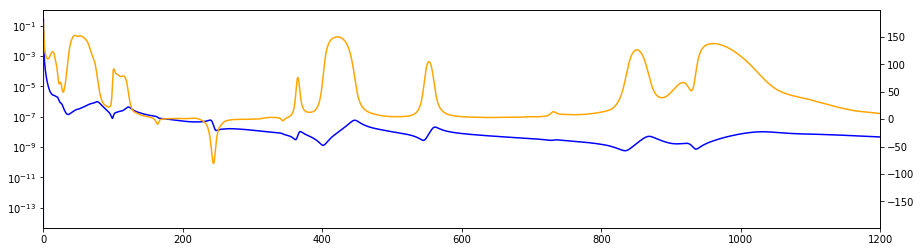

In [1033]:
pos = 0
_alpha = alpha[pos]

plt.figure(figsize=(15,4))
plt.semilogy(f_, np.abs(_alpha), 'blue')
plt.xlim(0, 1200)
plt.ylim(0, 1)
plt.twinx()
plt.plot(f_, np.angle(_alpha, deg=1), 'orange')

(-9.7642348564738e-09,
 5.425756868356329e-07,
 2.780887637174692e-07,
 9.835561571141871e-07)

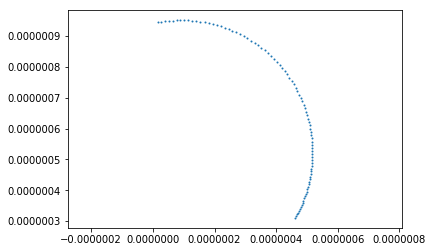

In [1034]:
frequencies = [[76,84],[113,128],[159,167],[239,247],[360,384],[420,500],[520,605],[727,740],\
               [840,890],[908,926],[940,1100],[1365,1383],[1400,1500]]
f_indexes = np.array([[int(np.argwhere(f==_[0])), int(np.argwhere(f==_[1]))] for _ in frequencies])

i = 0
index_min, index_max = f_indexes[i]
plt.plot(np.real(_alpha[index_min:index_max]), np.imag(_alpha[index_min:index_max]), 'o', markersize=1)
plt.axis('equal')

In [1035]:
centers = []
radiuses = []
gamma_angles = []
indexes_max = []

eta_ident = []
C_ident = []
f0_ident = []
for index_min, index_max in f_indexes:
    [x,y] = np.array([np.real(_alpha[index_min:index_max]), np.imag(_alpha[index_min:index_max])])
    # circle fitting
    A = np.array([[np.sum(x*x), np.sum(x*y), -np.sum(x)],
                 [np.sum(x*y), np.sum(y*y), -np.sum(y)],
                 [-np.sum(x), -np.sum(y), len(x)]])
    b = np.array([[-(np.sum(x*x*x) + np.sum(x*y*y))],
                 [-(np.sum(y*y*y) + np.sum(y*x*x))],
                 [np.sum(x*x) + np.sum(y*y)]])
    a, b, c = np.linalg.solve(A, b)
    x0 = -a[0]/2
    y0 = -b[0]/2
    R0 = np.sqrt(c[0]+x0*x0+y0*y0)
    centers.append([x0, y0])
    radiuses.append(R0)
    
    # finding position of resonance frequency
    d_gamma = three_point_angle(x0, y0, x[:-1], y[:-1], x[1:], y[1:])
    gamma_angles.append(d_gamma)
    dd_gamma = d_gamma[1:] - d_gamma[:-1]
    i_max = int(np.argwhere(d_gamma==np.nanmax(d_gamma)))
    indexes_max.append(i_max)
    w = f_*2*np.pi
    w0_ident = w[index_min+i_max]
    f0_ident.append(f_[index_min+i_max])
    
    # finding coefficient of dissipation
    r = 1 # num of points from resonance frequency position
    w_a = w[index_min+i_max+r]
    fi_a = three_point_angle(x0, y0, x[i_max], y[i_max], x[i_max+r], y[i_max+r])/2
    w_b = w[index_min+i_max-r]
    fi_b = three_point_angle(x0, y0, x[i_max], y[i_max], x[i_max-r], y[i_max-r])/2
    eta_id = float((w_a**2 - w_b**2)/w0_ident**2 * 1/(np.tan(fi_a) + np.tan(fi_b)))
    eta_ident.append(eta_id)
    
    # finding modal constant
    xD, yD = x0-(x[i_max]-x0), y0-(y[i_max]-y0)
    theta_id = np.arctan(-(x0-xD)/(y0-yD))
    Cr_ident = 2*R0*w0_ident**2*eta_id
    C_id = Cr_ident*np.exp(1.j*theta_id)
    C_ident.append(C_id)

Text(0, 0.5, 'Im($\\alpha$)')

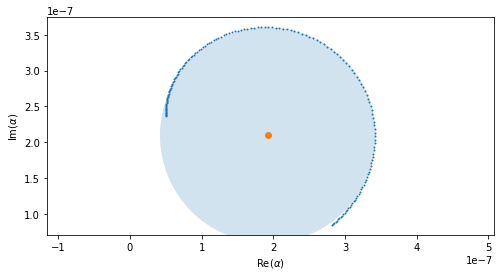

In [1036]:
i = 1
index_min, index_max = f_indexes[i]
ax = plt.figure(figsize=(8,4)).gca()
plt.plot(np.real(_alpha[index_min:index_max]), np.imag(_alpha[index_min:index_max]), 'o', markersize=1)
plt.plot(centers[i][0], centers[i][1], 'o')
circ = plt.Circle(centers[i], radiuses[i], alpha=0.2)
ax.add_artist(circ)
plt.axis('equal')
plt.xlabel(r'Re($\alpha$)')
plt.ylabel(r'Im($\alpha$)')

Text(0, 0.5, '$\\theta$ [rd]')

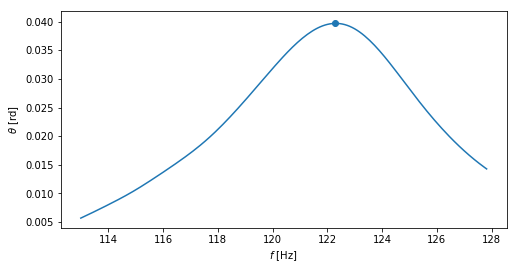

In [1037]:
i = 1
index_min, index_max = f_indexes[i]
plt.figure(figsize=(8,4))
plt.plot(f[index_min:index_max-1], gamma_angles[i])
plt.scatter(f[index_min+indexes_max[i]], gamma_angles[i][indexes_max[i]])
plt.xlabel('$f$ [Hz]')
plt.ylabel(r'$\theta$ [rd]')

In [1038]:
print(f0_ident)

[78.0, 122.27272727272728, 163.63636363636365, 241.54545454545456, 366.90909090909093, 446.0909090909091, 559.9090909090909, 729.5454545454546, 866.6363636363636, 923.2727272727273, 1021.7272727272727, 1379.3636363636365, 1407.6363636363637]


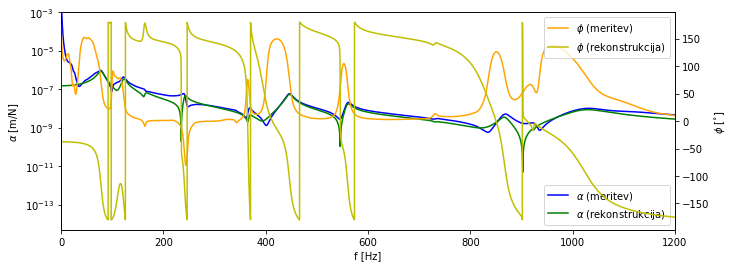

In [1039]:
# primerjava
pos = 0
plt.figure(figsize=(11,4))
plt.semilogy(f, np.abs(alpha[pos]), 'b', label=(r'$\alpha$ (meritev)'))
D = 0*(1-1.j)
plt.semilogy(f, np.abs(receptance(f0_ident, C_ident, D, eta_ident, f)), 'g', label=(r'$\alpha$ (rekonstrukcija)'))
plt.legend(loc=4)
plt.xlabel('f [Hz]')
plt.ylabel(r'$\alpha\ \mathrm{[m/N]}$')
plt.xlim(0, 1200)
plt.ylim(0, 0.001)
plt.twinx()
plt.plot(f, np.angle(alpha[pos], deg=1), 'orange', label=('$\phi$ (meritev)'))
plt.plot(f, np.angle(receptance(f0_ident, C_ident, D, eta_ident, f), deg=1), 'y', label=('$\phi$ (rekonstrukcija)'))
plt.ylabel('$\phi\ \mathrm{[^{\circ}]}$')
plt.legend(loc=1)

Modal shape

In [1017]:
C_pos = []
for pos in range(num_of_points):
    _alpha = alpha[pos]
    
    frequencies = [[76,84],[113,128],[159,167],[239,247],[360,384],[420,500],[520,605],[727,740],\
                   [840,890],[908,926],[940,1100],[1365,1383],[1400,1500]]
    f_indexes = np.array([[int(np.argwhere(f==_[0])), int(np.argwhere(f==_[1]))] for _ in frequencies])
    
    centers = []
    radiuses = []
    gamma_angles = []
    indexes_max = []
    
    eta_ident = []
    C_ident = []
    f0_ident = []
    for index_min, index_max in f_indexes:
        [x,y] = np.array([np.real(_alpha[index_min:index_max]), np.imag(_alpha[index_min:index_max])])
        # circle fitting
        A = np.array([[np.sum(x*x), np.sum(x*y), -np.sum(x)],
                     [np.sum(x*y), np.sum(y*y), -np.sum(y)],
                     [-np.sum(x), -np.sum(y), len(x)]])
        b = np.array([[-(np.sum(x*x*x) + np.sum(x*y*y))],
                     [-(np.sum(y*y*y) + np.sum(y*x*x))],
                     [np.sum(x*x) + np.sum(y*y)]])
        a, b, c = np.linalg.solve(A, b)
        x0 = -a[0]/2
        y0 = -b[0]/2
        R0 = np.sqrt(c[0]+x0*x0+y0*y0)
        centers.append([x0, y0])
        radiuses.append(R0)
        
        # finding position of resonance frequency
        d_gamma = three_point_angle(x0, y0, x[:-1], y[:-1], x[1:], y[1:])
        gamma_angles.append(d_gamma)
        dd_gamma = d_gamma[1:] - d_gamma[:-1]
        i_max = int(np.argwhere(d_gamma==np.nanmax(d_gamma)))
        indexes_max.append(i_max)
        w = f_*2*np.pi
        w0_ident = w[index_min+i_max]
        f0_ident.append(f_[index_min+i_max])
        
        # finding coefficient of dissipation
        r = 1 # num of points from resonance frequency position
        w_a = w[index_min+i_max+r]
        fi_a = three_point_angle(x0, y0, x[i_max], y[i_max], x[i_max+r], y[i_max+r])/2
        w_b = w[index_min+i_max-r]
        fi_b = three_point_angle(x0, y0, x[i_max], y[i_max], x[i_max-r], y[i_max-r])/2
        eta_id = float((w_a**2 - w_b**2)/w0_ident**2 * 1/(np.tan(fi_a) + np.tan(fi_b)))
        eta_ident.append(eta_id)
        
        # finding modal constant
        xD, yD = x0-(x[i_max]-x0), y0-(y[i_max]-y0)
        theta_id = np.arctan(-(x0-xD)/(y0-yD))
        Cr_ident = 2*R0*w0_ident**2*eta_id
        C_id = Cr_ident*np.exp(1.j*theta_id)
        C_ident.append(C_id)
    
    C_pos.append(C_ident[1])

Text(0, 0.5, 'Modalna konstanta')

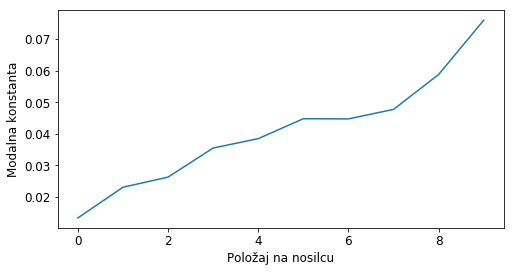

In [1019]:
plt.figure(figsize=(8,4))
plt.rc('font', size=12)
plt.plot(np.abs(C_pos))
plt.xlabel('Položaj na nosilcu')
plt.ylabel('Modalna konstanta')

# neuspešen poskus izboljšave circle fitting method

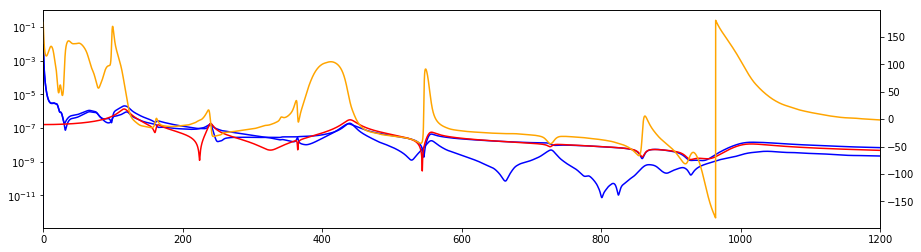

In [899]:
#pos = 5
#_alpha = alpha[pos]
#i = 0
#f0_subs = np.append(f0_ident[:i], f0_ident[i+1:])
#C_subs = np.append(C_ident[:i], C_ident[i+1:])
#eta_subs = np.append(eta_ident[:i], eta_ident[i+1:])
#_alpha = alpha[pos] - receptance(f0_subs, C_subs, D, eta_subs, f)
#
#plt.figure(figsize=(15,4))
#plt.semilogy(f_, np.abs(_alpha), 'blue')
#plt.semilogy(f_, np.abs(alpha[pos]), 'blue')
#plt.semilogy(f_, np.abs(receptance(f0_subs, C_subs, D, eta_subs, f)), 'red')
#plt.xlim(0, 1200)
#plt.ylim(0, 1)
#plt.twinx()
#plt.plot(f_, np.angle(_alpha, deg=1), 'orange')

In [900]:
#pos = 0
#for j in range(20):
#    for i in range(len(f0_ident)):
#        
#        
#        f0_subs = np.append(f0_ident[:i], f0_ident[i+1:])
#        C_subs = np.append(C_ident[:i], C_ident[i+1:])
#        eta_subs = np.append(eta_ident[:i], eta_ident[i+1:])
#        _alpha = alpha[pos] - receptance(f0_subs, C_subs, D, eta_subs, f)
#        
#        frequencies = [[73,90],[105,140],[150,180],[220,260],[340,396],[410,520],[510,620],[710,760],\
#                       [840,890],[908,926],[940,1100],[1365,1383],[1400,1500]]
#        _ = frequencies[i]
#        f_indexes = np.array([int(np.argwhere(f==_[0])), int(np.argwhere(f==_[1]))])
#        
#        centers = []
#        radiuses = []
#        gamma_angles = []
#        indexes_max = []
#        
#        index_min, index_max = f_indexes
#        [x,y] = np.array([np.real(_alpha[index_min:index_max]), np.imag(_alpha[index_min:index_max])])
#        # circle fitting
#        A = np.array([[np.sum(x*x), np.sum(x*y), -np.sum(x)],
#                     [np.sum(x*y), np.sum(y*y), -np.sum(y)],
#                     [-np.sum(x), -np.sum(y), len(x)]])
#        b = np.array([[-(np.sum(x*x*x) + np.sum(x*y*y))],
#                     [-(np.sum(y*y*y) + np.sum(y*x*x))],
#                     [np.sum(x*x) + np.sum(y*y)]])
#        a, b, c = np.linalg.solve(A, b)
#        x0 = -a[0]/2
#        y0 = -b[0]/2
#        R0 = np.sqrt(c[0]+x0*x0+y0*y0)
#        centers.append([x0, y0])
#        radiuses.append(R0)
#        
#        # finding position of resonance frequency
#        d_gamma = three_point_angle(x0, y0, x[:-1], y[:-1], x[1:], y[1:])
#        gamma_angles.append(d_gamma)
#        dd_gamma = d_gamma[1:] - d_gamma[:-1]
#        i_max = int(np.argwhere(d_gamma==np.nanmax(d_gamma)))
#        indexes_max.append(i_max)
#        w = f_*2*np.pi
#        w0_ident = w[index_min+i_max]
#        f0_id = f_[index_min+i_max]
#        
#        # finding coefficient of dissipation
#        r = 1 # num of points from resonance frequency position
#        w_a = w[index_min+i_max+r]
#        fi_a = three_point_angle(x0, y0, x[i_max], y[i_max], x[i_max+r], y[i_max+r])/2
#        w_b = w[index_min+i_max-r]
#        fi_b = three_point_angle(x0, y0, x[i_max], y[i_max], x[i_max-r], y[i_max-r])/2
#        eta_id = float((w_a**2 - w_b**2)/w0_ident**2 * 1/(np.tan(fi_a) + np.tan(fi_b)))
#        
#        # finding modal constant
#        xD, yD = x0-(x[i_max]-x0), y0-(y[i_max]-y0)
#        theta_id = np.arctan((x0-xD)/(y0-yD)) + np.pi
#        Cr_ident = 2*R0*w0_ident**2*eta_id
#        C_id = Cr_ident*np.exp(1.j*theta_id)
#        
#        f0_ident[i] = f0_id
#        C_ident[i] = C_id
#        eta_ident[i] = eta_id

In [902]:
#f0_ident[i] = f0_id
#C_ident[i] = C_id
#eta_ident[i] = eta_id

## Ewins-Gleeson method

### Simulirani podatki

In [1021]:
f0 = [320, 800, 1100]
C = [0.1+0.1j, 0.05+0.05j, 0.12-0.02j]
C = [0.1, 0.05, 0.12]
D = 0*1e-9*(1-1j)
eta = [0.001*5e-3, 0.002*5e-3, 0.003*5e-3]
df = 1/500
f_ = 1*np.arange(0, 1500, df)

def receptance(f0, C, D, eta, f):
    f0 = np.array(f0)
    C = np.array(C)
    eta = np.array(eta)

    w0 = f0*2*np.pi
    w = f*2*np.pi
    
    n = len(f0)
    alpha = np.zeros(len(f), dtype=complex)
    for _ in range(n):
        alpha += C[_]/(w0[_]**2 - w**2 +1.j*eta[_]*w0[_]**2)
    alpha += D
    
    return alpha

(0, 1200)

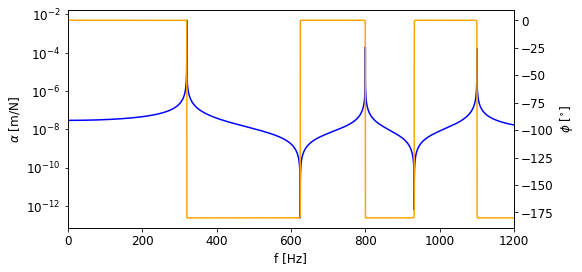

In [1022]:
_alpha = receptance(f0, C, D, eta, f_)
plt.figure(figsize=(8,4))
plt.semilogy(f_, np.abs(_alpha), 'blue')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\alpha\ \mathrm{[m/N]}$')
plt.twinx()
plt.plot(f_, np.angle(_alpha, deg=1), 'orange')
plt.ylabel('$\phi\ \mathrm{[^{\circ}]}$')
plt.xlim(0,1200)

Text(0, 0.5, '$\\alpha\\ \\mathrm{[m/N]}$')

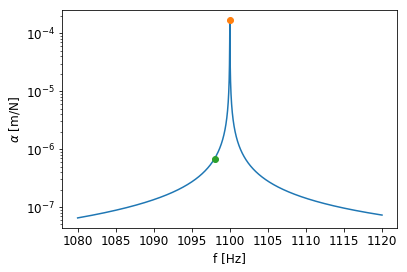

In [1024]:
frequencies = [[200,400],[800,1200]]
frequencies = [[ab,cd] for ab, cd in zip(np.array(f0)-20, np.array(f0)+20)]   
f_indexes = np.array([[int(np.argwhere(f_==_[0])), int(np.argwhere(f_==_[1]))] for _ in frequencies])

i_max = []
f0_ident = []
f_not_max = []
rec_max = []
rec_real = []
r = 1000
for i in range(len(frequencies)):
    index_min, index_max = f_indexes[i]
    position_max = np.argmax(np.abs(_alpha[index_min:index_max]))
    i_max.append(position_max) # positions of max amplitude
    f0_ident.append(f_[index_min+position_max]) # natural frequencies
    rec_max.append(_alpha[index_min+position_max])
    f_not_max.append(f_[index_min+position_max-r]) # frequency around natural frequency
    rec_real.append(np.real(_alpha[index_min+position_max-r])) # real parts of receptance at f_not_max

i = 2
index_min, index_max = f_indexes[i]
plt.semilogy(f_[index_min:index_max], np.abs(_alpha[index_min:index_max]))
plt.semilogy(f_[index_min+i_max[i]], np.abs(_alpha[index_min+i_max[i]]),'o')
plt.semilogy(f_[index_min+i_max[i]-r], np.real(_alpha[index_min+i_max[i]-r]), 'o')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\alpha\ \mathrm{[m/N]}$')

In [906]:
import itertools

w0_ident = np.array(f0_ident)*2*np.pi
w_not_max = np.array(f_not_max)*2*np.pi
num_of_resonance = len(w0_ident)
A = np.zeros((num_of_resonance,num_of_resonance))
for item in itertools.product(np.arange(num_of_resonance), repeat=2):
    i, j = item
    A[i,j] = 1/(w0_ident[j]**2 - w_not_max[i]**2)
b = np.array(rec_real)

In [907]:
Cr_ident = np.linalg.solve(A, b)
C_ident = Cr_ident
C_ident

array([0.1       , 0.05      , 0.11999998])

In [908]:
eta_ident = np.abs(Cr_ident)/(np.abs(rec_max)*np.array(f_max)**2)
eta_ident

array([6.68196689e-07, 8.35245843e-06, 2.36870464e-05])

(0, 1200)

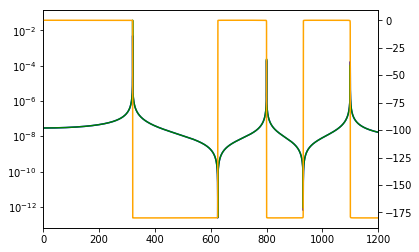

In [909]:
# primerjava
plt.semilogy(f_, np.abs(_alpha), 'blue')
plt.semilogy(f_, np.abs(receptance(f0_ident, C_ident, D, eta_ident, f_)), 'green')
plt.twinx()
plt.plot(f_, np.angle(_alpha, deg=1), 'orange')
plt.xlim(0,1200)

### Real data

(0, 1200)

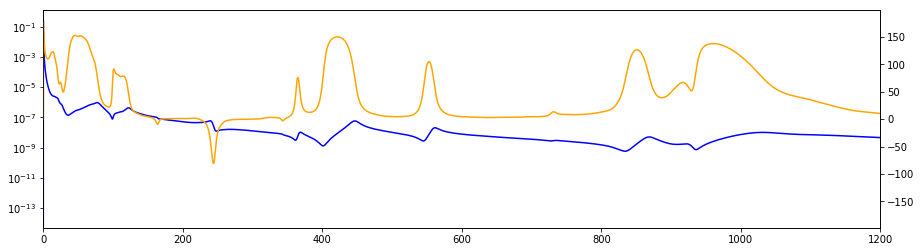

In [1041]:
pos = 0
_alpha = alpha[pos]
f_ = f
plt.figure(figsize=(15,4))
plt.semilogy(f_, np.abs(_alpha), 'blue')
plt.twinx()
plt.plot(f_, np.angle(_alpha, deg=1), 'orange')
plt.xlim(0,1200)

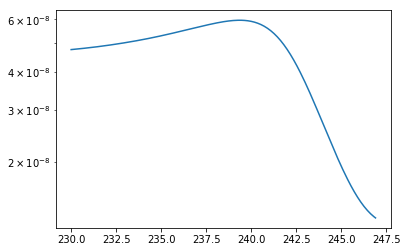

In [1042]:
frequencies = [[70,83],[117,128],[420,500],[540,605],[360,384],[230,247],[840,890],[908,930],[930,1100]]#,[230,247]]#,[360,384],[420,500],[550,605],[730,740],\
#               [840,890],[908,926],[940,1100],[1372,1383],[1401,1420]]
f_indexes = np.array([[int(np.argwhere(f_==_[0])), int(np.argwhere(f_==_[1]))] for _ in frequencies])

i = 5
index_min, index_max = f_indexes[i]
plt.semilogy(f_[index_min:index_max], np.abs(_alpha[index_min:index_max]))

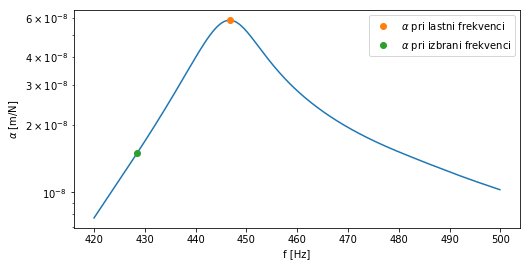

In [1043]:
i_max = []
f0_ident = []
f_not_max = []
rec_max = []
rec_real = []
r_i = np.array([200,200,200,150,50,80,300,-90,1050])#,-50])#,-50,1,50,15,80,40,220,22,20])
for i in range(len(frequencies)):
    r = r_i[i]
    index_min, index_max = f_indexes[i]
    position_max = np.argmax(np.abs(_alpha[index_min:index_max]))
    i_max.append(position_max) # positions of max amplitude
    f0_ident.append(f_[index_min+position_max]) # natural frequencies
    rec_max.append(_alpha[index_min+position_max])
    f_not_max.append(f_[index_min+position_max-r]) # frequency around natural frequency
    rec_real.append(np.real(_alpha[index_min+position_max-r])) # real parts of receptance at f_not_max

i = 2
r = r_i[i]
index_min, index_max = f_indexes[i]
plt.figure(figsize=(8,4))
plt.rc('font', size=10)
plt.semilogy(f_[index_min:index_max], np.abs(_alpha[index_min:index_max]))
plt.semilogy(f_[index_min+i_max[i]], np.abs(_alpha[index_min+i_max[i]]),'o', label=r'$\alpha$ pri lastni frekvenci')
plt.semilogy(f_[index_min+i_max[i]-r], np.abs(_alpha[index_min+i_max[i]-r]), 'o', label=r'$\alpha$ pri izbrani frekvenci')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\alpha\ \mathrm{[m/N]}$')
plt.legend()

In [1044]:
import itertools

w0_ident = np.array(f0_ident)*2*np.pi
w_not_max = np.array(f_not_max)*2*np.pi
num_of_resonance = len(w0_ident)
A = np.zeros((num_of_resonance,num_of_resonance))
for item in itertools.product(np.arange(num_of_resonance), repeat=2):
    i, j = item
    A[i,j] = 1/(w_not_max[i]**2 - w0_ident[j]**2)
b = np.array(rec_real)

In [1045]:
Cr_ident = np.linalg.solve(A, b)
C_ident = Cr_ident
C_ident

array([ 0.03259192,  0.02366807,  0.01191246,  0.00382815,  0.00047259,
       -0.00264208,  0.00229874,  0.00061464,  0.02403466])

In [1046]:
eta_ident = np.abs(Cr_ident)/(np.abs(rec_max)*np.array(f_max)**2)
eta_ident

array([0.001123  , 0.00180592, 0.0067416 , 0.00613817, 0.00148577,
       0.00146501, 0.01494795, 0.01142108, 0.07807119])

(0, 1200)

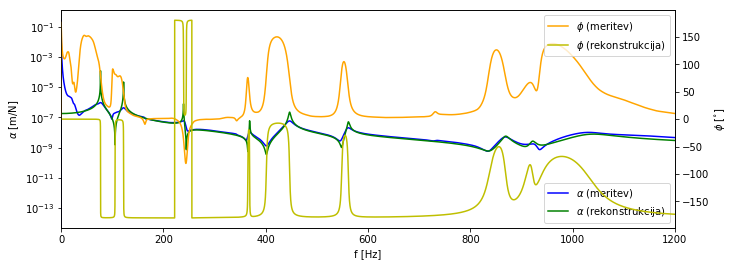

In [1047]:
# primerjava
plt.figure(figsize=(11,4))
plt.semilogy(f_, np.abs(_alpha), 'b', label=(r'$\alpha$ (meritev)'))
plt.semilogy(f_, np.abs(receptance(f0_ident, C_ident, D, eta_ident, f_)), 'g', label=(r'$\alpha$ (rekonstrukcija)'))
plt.legend(loc=4)
plt.xlabel('f [Hz]')
plt.ylabel(r'$\alpha\ \mathrm{[m/N]}$')
plt.twinx()
plt.plot(f, np.angle(alpha[pos], deg=1), 'orange', label=('$\phi$ (meritev)'))
plt.plot(f, np.angle(receptance(f0_ident, C_ident, D, eta_ident, f_), deg=1), 'y', label=('$\phi$ (rekonstrukcija)'))
plt.ylabel('$\phi\ \mathrm{[^{\circ}]}$')
plt.legend(loc=1)
plt.xlim(0,1200)

Modal shape

In [1011]:
C_pos1 = []

for pos in range(num_of_points):
    _alpha = alpha[pos]
    f_ = f
    frequencies = [[70,83],[117,128],[420,500],[540,605],[360,384],[230,247],[840,890],[908,930],[930,1100]]#,[230,247]]#,[360,384],[420,500],[550,605],[730,740],\
    #               [840,890],[908,926],[940,1100],[1372,1383],[1401,1420]]
    f_indexes = np.array([[int(np.argwhere(f_==_[0])), int(np.argwhere(f_==_[1]))] for _ in frequencies])
    i_max = []
    f0_ident = []
    f_not_max = []
    rec_max = []
    rec_real = []
    r_i = np.array([200,200,200,150,50,80,300,-90,1050])#,-50])#,-50,1,50,15,80,40,220,22,20])
    for i in range(len(frequencies)):
        r = r_i[i]
        index_min, index_max = f_indexes[i]
        position_max = np.argmax(np.abs(_alpha[index_min:index_max]))
        i_max.append(position_max) # positions of max amplitude
        f0_ident.append(f_[index_min+position_max]) # natural frequencies
        rec_max.append(_alpha[index_min+position_max])
        f_not_max.append(f_[index_min+position_max-r]) # frequency around natural frequency
        rec_real.append(np.real(_alpha[index_min+position_max-r])) # real parts of receptance at f_not_max
    w0_ident = np.array(f0_ident)*2*np.pi
    w_not_max = np.array(f_not_max)*2*np.pi
    num_of_resonance = len(w0_ident)
    A = np.zeros((num_of_resonance,num_of_resonance))
    for item in itertools.product(np.arange(num_of_resonance), repeat=2):
        i, j = item
        A[i,j] = 1/(w_not_max[i]**2 - w0_ident[j]**2)
    b = np.array(rec_real)
    Cr_ident = np.linalg.solve(A, b)
    C_ident = Cr_ident
    eta_ident = np.abs(Cr_ident)/(np.abs(rec_max)*np.array(f_max)**2)
    
    C_pos1.append(C_ident[1])

Text(0, 0.5, 'Modalna konstanta')

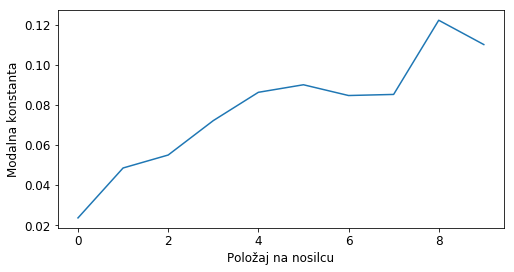

In [1016]:
plt.figure(figsize=(8,4))
plt.rc('font', size=12)
plt.plot(np.abs(C_pos1))
plt.xlabel('Položaj na nosilcu')
plt.ylabel('Modalna konstanta')